In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import numpy as np

import torch
from torch import nn
from torch.optim import Adam
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import CIFAR10
from torchvision import transforms

In [6]:
class CNNCifar10(nn.Module):
    def __init__(self):
        super(CNNCifar10, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 12, 4, stride=2, padding=1),            # [batch, 12, 16, 16]
            nn.ReLU(),
            nn.Conv2d(12, 24, 4, stride=2, padding=1),           # [batch, 24, 8, 8]
            nn.ReLU(),
			nn.Conv2d(24, 48, 4, stride=2, padding=1),           # [batch, 48, 4, 4]
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
			nn.ConvTranspose2d(48, 24, 4, stride=2, padding=1),  # [batch, 24, 8, 8]
            nn.ReLU(),
			nn.ConvTranspose2d(24, 12, 4, stride=2, padding=1),  # [batch, 12, 16, 16]
            nn.ReLU(),
            nn.ConvTranspose2d(12, 3, 4, stride=2, padding=1),   # [batch, 3, 32, 32]
            nn.Sigmoid(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [3]:
transform = transforms.Compose(
    [
        transforms.ToTensor(), 
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

trainset = CIFAR10(root='~/data',  train=True, download=True, transform=transform)
train_dl = DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testset = CIFAR10(root='~/data', train=False, download=True, transform=transform)
test_dl = DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

print(len(train_dl), len(test_dl))

100%|███████████████████████████████████| 170498071/170498071 [00:38<00:00, 4373036.00it/s]


Extracting /home/khoidh/data/cifar-10-python.tar.gz to /home/khoidh/data
Files already downloaded and verified
782 157


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu", index = 0)

epochs = 10

model = CNNCifar10().to(device)

optimizer = Adam(model.parameters(), lr = 0.001)

scheduler = CosineAnnealingLR(optimizer, epochs)

loss_fn = nn.MSELoss()

In [9]:
for epoch in range(epochs):
    model.train()
    tr_total_loss = 0
    for train_img, _ in tqdm(train_dl):
        train_img = train_img.to(device)

        gen_img = model(train_img)
        train_loss = loss_fn(gen_img, train_img)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        tr_total_loss += train_loss.item()

    model.eval()
    with torch.no_grad():
        va_total_loss = 0
        for valid_img, _ in tqdm(test_dl):
            valid_img = valid_img.to(device)

            gen_img = model(valid_img)

            valid_loss = loss_fn(gen_img, valid_img)

            va_total_loss += valid_loss.item()

    print(f"Epoch: {epoch} - TrainLoss: {tr_total_loss/len(train_dl)} - ValidLoss: {va_total_loss/len(test_dl)}")

100%|████████████████████████████████████████████████████| 157/157 [00:02<00:00, 54.26it/s]


Epoch: 0 - TrainLoss: 0.18974348433944574 - ValidLoss: 0.16520722096513032


100%|████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.90it/s]


Epoch: 1 - TrainLoss: 0.16129557354866392 - ValidLoss: 0.15239279902285072


100%|████████████████████████████████████████████████████| 157/157 [00:02<00:00, 54.46it/s]


Epoch: 2 - TrainLoss: 0.15305970102319938 - ValidLoss: 0.14843380285106647


100%|████████████████████████████████████████████████████| 157/157 [00:02<00:00, 54.03it/s]


Epoch: 3 - TrainLoss: 0.15055645859378683 - ValidLoss: 0.14674192121264282


100%|████████████████████████████████████████████████████| 157/157 [00:02<00:00, 55.20it/s]


Epoch: 4 - TrainLoss: 0.14919508711608778 - ValidLoss: 0.1456442711649427


100%|████████████████████████████████████████████████████| 157/157 [00:02<00:00, 55.36it/s]


Epoch: 5 - TrainLoss: 0.1482759376182733 - ValidLoss: 0.14478937484276522


100%|████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.32it/s]


Epoch: 6 - TrainLoss: 0.14738962188591737 - ValidLoss: 0.14401686870178598


100%|████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.20it/s]


Epoch: 7 - TrainLoss: 0.146843214045324 - ValidLoss: 0.14362737152037347


100%|████████████████████████████████████████████████████| 157/157 [00:02<00:00, 54.28it/s]


Epoch: 8 - TrainLoss: 0.14647625781157436 - ValidLoss: 0.14328300554281587


100%|████████████████████████████████████████████████████| 157/157 [00:02<00:00, 54.89it/s]

Epoch: 9 - TrainLoss: 0.14618001941143705 - ValidLoss: 0.14307385483744797


 10%|█████▌                                                 | 1/10 [00:00<00:05,  1.78it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
 30%|████████████████▌                                      | 3/10 [00:00<00:01,  5.12it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
 50%|███████████████████████████▌                           | 5/10 [00:00<00:00,  7.79it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
 70%|██████████████████████████████████████▌                | 7/10 

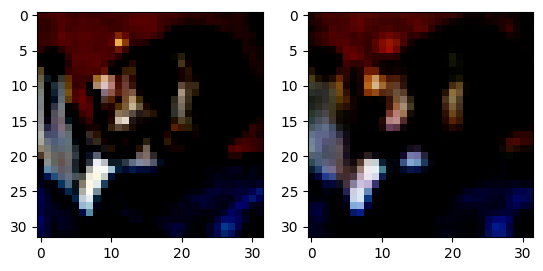

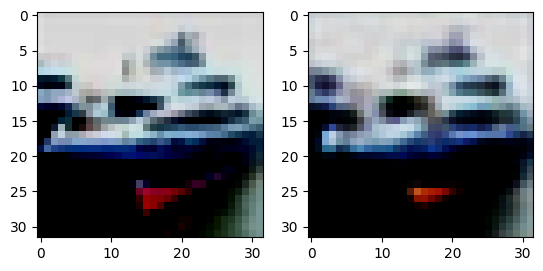

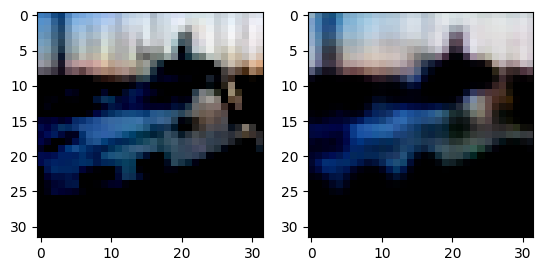

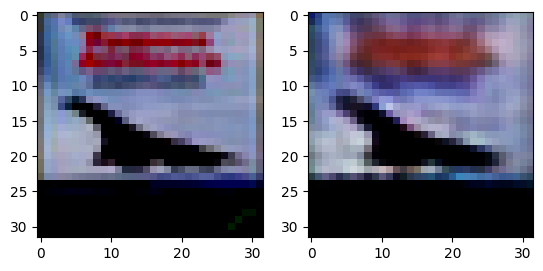

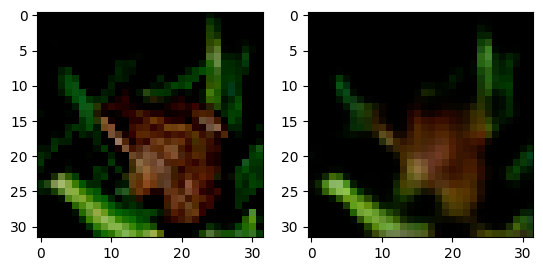

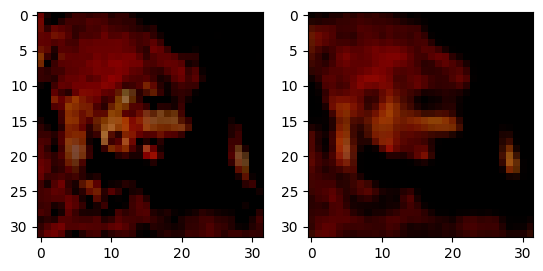

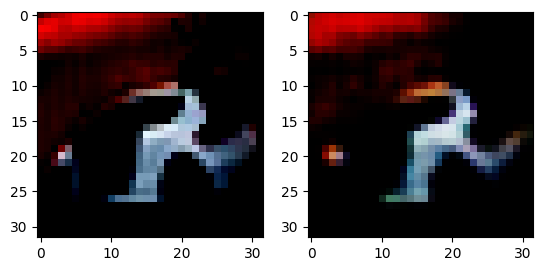

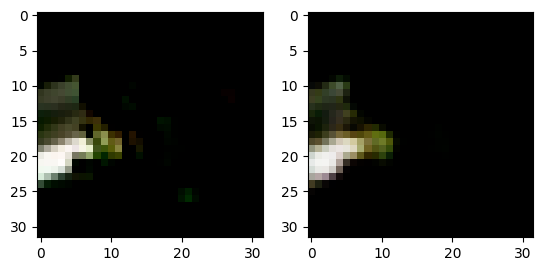

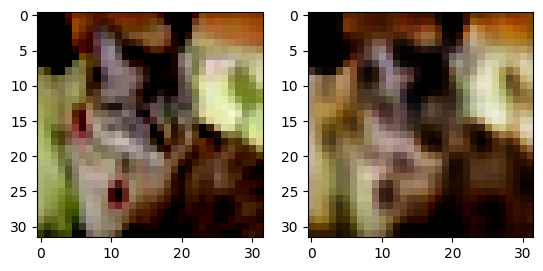

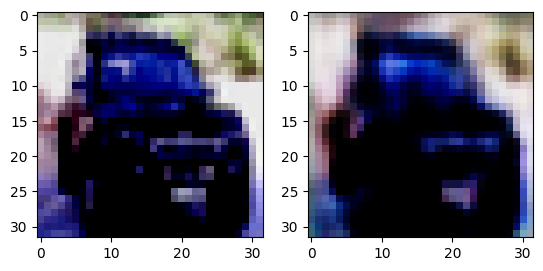

In [10]:
model.eval()
with torch.no_grad():
    for test_case_idx in tqdm(range(10)):
        valid_img, _ = testset[test_case_idx]
        valid_img = valid_img.unsqueeze(dim=0).to(device)

        gen_img = model(valid_img)        

        f, axarr = plt.subplots(1, 2)
        axarr[0].imshow(valid_img[0].cpu().permute(1, -1, 0).numpy())
        axarr[1].imshow(gen_img[0].cpu().permute(1, -1, 0).numpy())